In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('/home/jupyter-l.fedoseeva-12/Lesson_3/Miniproject_3/user_data.csv', sep=',')

In [3]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
user_data.shape

(2954, 3)

In [5]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs = pd.read_csv('/home/jupyter-l.fedoseeva-12/Lesson_3/Miniproject_3/logs.csv', sep=',')

In [8]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [9]:
logs.shape

(4500, 4)

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [12]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [13]:
number_success = logs.query('success == True') \
    .groupby('client') \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending=False) \
    .rename(columns={'success':'number_success'})

In [14]:
number_success.head(10)

,number_success
client,
12179,41
61468,41
52870,41
61473,41
92584,41
82563,41
78349,41
36165,41
28719,41


In [15]:
max_successes = number_success.number_success.max()

In [16]:
number_success.query('number_success == @max_successes').index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [17]:
all_data = user_data.merge(logs, how = 'inner', on='client')

In [18]:
all_data.platform.value_counts()

phone       2117
computer    1140
tablet       182
Name: platform, dtype: int64

In [19]:
all_data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [20]:
all_premium_true = all_data.query('premium == True')

In [21]:
all_premium_false = all_data.query('premium == False')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

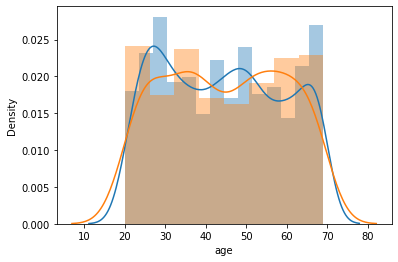

In [64]:
age_from_premium = sns.distplot(all_premium_false.age)
age_from_premium = sns.distplot(all_premium_true.age)

sns.plt.show()

In [25]:
number_success_grafic = all_data.groupby('client') \
    .agg({'success': 'sum'})

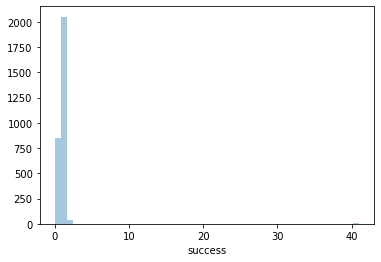

In [26]:
age_from_premium = sns.distplot(number_success_grafic.success, kde=False)

In [82]:
all_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [121]:
computer_success = all_data.query('platform == "computer" and success == True')

In [122]:
computer_success

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


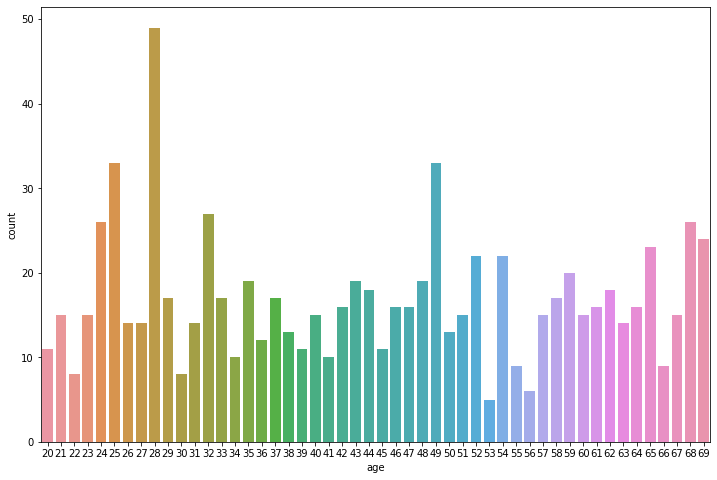

In [123]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='age', data=computer_success)

In [27]:
computer_grafic = all_data.query('platform == "computer" and success == True') \
    .groupby('age', as_index=False) \
    .agg({'success': 'sum'})

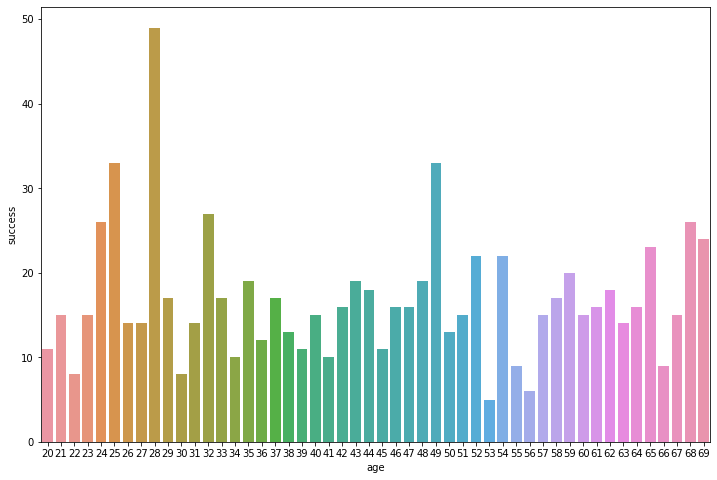

In [28]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='age', y='success', data=computer_grafic)